# Zweidimensionale Zufallsvariablen: Bsp. Biathlon 
Die Biathlethen Bole Einar Jörndalen und Gicco Roß kommen gleichzeitig am letzten Schießstand
an. Gicco hat eine Treffsicherheit von 95%, Bole von 85%. Wie groß ist die Wahrscheinlichkeit,
dass der Norweger (Bole) i-mal, und der Deutsche (Gicco) j-mal treffen? $0<=i,j <=5$. Wie hoch ist die Wahrscheinlichkeit, dass Bole häufiger, gleich häufig, oder weniger häufig trifft als Gicco?

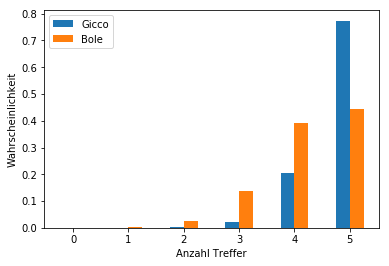

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 5
x = np.arange(n+1)
p_gicco = binom.pmf(x, n, 0.95)
p_bole = binom.pmf(x, n, 0.85)

plt.figure()
plt.clf()
plt.bar(x, p_gicco, width=-0.25, align='edge', label='Gicco')
plt.bar(x, p_bole, width=0.25, align='edge', label='Bole')
plt.xlabel('Anzahl Treffer')
plt.ylabel('Wahrscheinlichkeit')
plt.legend();

## Verbundwahrscheinlichkeit
Wir betrachten die Verbundwahrscheinlichkeit $P(X_1=i,X_2=j)$ für $i$ Treffer von Gicco und $j$ Treffer von Bole. Die Wahrscheinlichkeiten sind unabhängig voneinander.
$$
P(X_1=i,X_2=j) = P(X_1=i)\cdot P(X_2=j)
$$

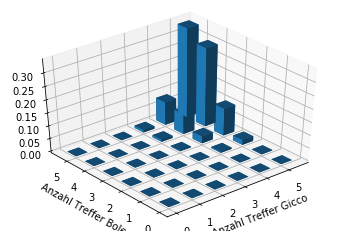

In [4]:
from mpl_toolkits.mplot3d import Axes3D

p_verbund = p_gicco.reshape(6,1) @ p_bole.reshape(1,6)
fig = plt.figure()
ax = fig.gca(projection = '3d')

xpos, ypos = np.meshgrid(x, x)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(xpos)
dy = dx.copy()
dz = p_verbund.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.view_init(elev=40, azim=230)

plt.xlabel('Anzahl Treffer Gicco')
plt.ylabel('Anzahl Treffer Bole');

Wie kann man nun die Wahrscheinlichkeit ausrechnen, dass Gicco gewinnt? Also $P(X_1>X_2)$?